Install ahijevyc/MetPy branch parcel_with_virtual_temperature. [link](https://github.com/ahijevyc/MetPy/tree/parcel_with_virtual_temperature)
* handles missing dewpoints (water vapor pressure=0, mixing ratio=0, Tv=T)

In [1]:
import logging

import cm1.input.era5
import cm1.input.sounding
import matplotlib.pyplot as plt
import pandas as pd
from cm1.skewt import skewt
from cm1.utils import TMPDIR
from metpy.units import units

# Configure logging
logging.basicConfig(
    level=logging.WARNING, format="%(asctime)s - %(levelname)s: %(message)s", force=True
)

### Predefined CM1 input soundings

2025-02-22 13:21:01,894 - WARNING: got T_parcel 26.71 °C from SP 1006.0 hPa and surface_potential_temperature 26.20 °C
2025-02-22 13:21:01,896 - WARNING: got parcel_mixing_ratio 20.000 g / kg from surface_mixing_ratio
2025-02-22 13:21:01,898 - WARNING: p_parcel 1006.0 hPa T_parcel 26.712075530467132 °C Td_parcel 24.82 °C parcel_mixing_ratio 20.000 g / kg
2025-02-22 13:21:01,900 - WARNING: lcl_p 978.7 hPa lcl_t 297.51 K
2025-02-22 13:21:01,949 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))
2025-02-22 13:21:02,086 - WARNING: got T_parcel 24.70 °C from SP 1016.3 hPa and surface_potential_temperature 23.33 °C
2025-02-22 13:21:02,087 - WARNING: got parcel_mixing_ratio 15.600 g / kg from surface_mixing_ratio
2025-02-22 13:21:02,089 - WARNING: p_parcel 1016.3 hPa T_parcel 24.699370084934003 °C Td_parcel 21.01 °C parcel_mixing_ratio 15.600 g / kg
2025-02-22 13:21:02,090 - WARNING: lcl_p 962.8 hPa lcl_t 293.28 K
2025-02-22 13:21:02,123 - WARNING: Ignore input Tv. Derive from T, qv(p,T

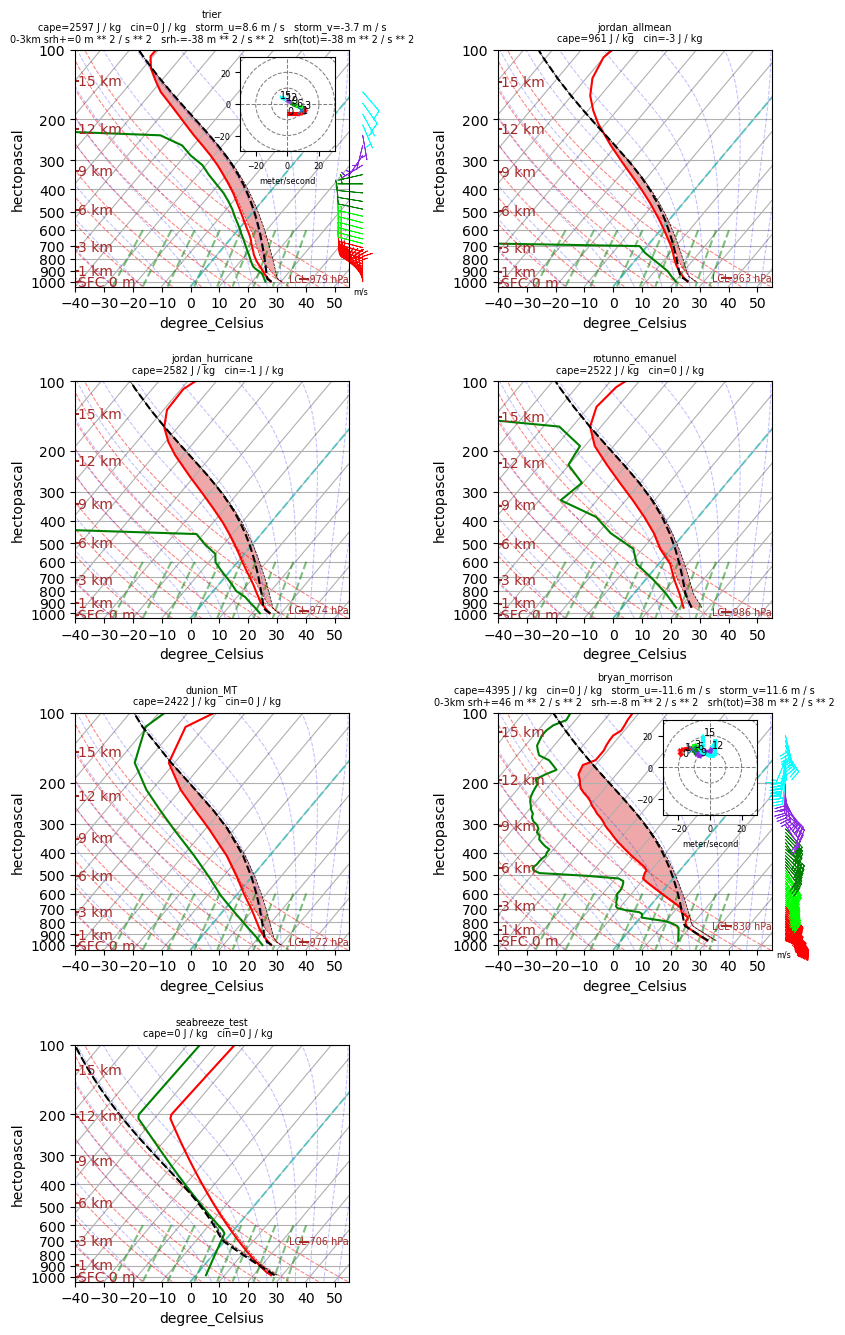

In [2]:
dss = [
    cm1.input.sounding.trier(),
    cm1.input.sounding.jordan_allmean(),
    cm1.input.sounding.jordan_hurricane(),
    cm1.input.sounding.rotunno_emanuel(),
    cm1.input.sounding.dunion_MT(),
    cm1.input.sounding.bryan_morrison(),
    cm1.input.sounding.seabreeze_test(),
]
fig, axes = plt.subplots(
    ncols=2,
    nrows=4,
    sharex=True,
    sharey=True,
    figsize=(10, 16),
    gridspec_kw={"hspace": 0.4},
)
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

for i, ds in enumerate(dss):
    # Use subplot because skewt() uses metpy.plots.SkewT, which uses it.
    logging.info(ds.attrs["case"])
    skew = skewt(ds, fig=fig, subplot=(4, 2, i + 1))
    skew.ax.set_title(
        ds.attrs["case"] + skew.ax.get_title(), fontsize="x-small"
    )  # Set title to sounding case

In [3]:
valid_time = pd.to_datetime("20240525")
lon = -95 * units.degree_E
lat = 33 * units.degree_N
ds_aws = cm1.input.sounding.era5_aws(valid_time, lat, lon)
ds_aws

2025-02-22 13:21:42,484 - WARNING: Found cached s3 128_133_q.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:42,486 - WARNING: Found cached s3 128_130_t.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:42,487 - WARNING: Found cached s3 128_131_u.ll025uv 2024-05-25 00:00:00
2025-02-22 13:21:42,496 - WARNING: Found cached s3 128_132_v.ll025uv 2024-05-25 00:00:00
2025-02-22 13:21:42,507 - WARNING: Found cached s3 128_135_w.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:42,508 - WARNING: Found cached s3 128_129_z.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:50,553 - WARNING: Found cached s3 128_134_sp.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:50,604 - WARNING: Found cached s3 128_165_10u.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:50,619 - WARNING: Found cached s3 128_166_10v.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:50,641 - WARNING: Found cached s3 128_167_2t.ll025sc 2024-05-25 00:00:00
2025-02-22 13:21:50,650 - WARNING: Found cached s3 128_168_2d.ll025sc 2024-05-25 00:00:00
2025-02-22 13:

<xarray.Dataset> Size: 2kB
Dimensions:                        (level: 37)
Coordinates:
    longitude                      float64 8B 265.0
    latitude                       float64 8B 33.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/29)
    Q                              (level) float32 148B <Quantity(dask.array<...
    T                              (level) float32 148B <Quantity(dask.array<...
    U                              (level) float32 148B <Quantity(dask.array<...
    V                              (level) float32 148B <Quantity(dask.array<...
    W                              (level) float32 148B <Quantity(dask.array<...
    Z                              (level) float32 148B <Quantity(dask.array<...
    ...                             ...
    SLOR                           float32 4B <Quantity(dask.array<getitem, s...
    SLT                            float32 4B <Quantity(dask.array<getitem, s...
    TVH                            float32 4B <Quantity(dask.array<getitem, s...
    TVL                            float32 4B <Quantity(dask.array<getitem, s...
    surface_geopotential           float32 4B <Quantity(dask.array<getitem, s...
    surface_geopotential_height    float32 4B <Quantity(dask.array<getitem, s...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

### Given a latitude and longitude, select the nearest ERA5 grid point and 4 neighbors
* nearest grid point `G`
* `north` neighbor
* `south`
* `west`
* `east`

In [18]:
cm1.input.era5.aws(valid_time)

2025-02-14 16:05:43,133 - WARNING: Found cached s3 128_133_q.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,134 - WARNING: Found cached s3 128_130_t.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,135 - WARNING: Found cached s3 128_131_u.ll025uv 2024-05-25 00:00:00
2025-02-14 16:05:43,136 - WARNING: Found cached s3 128_132_v.ll025uv 2024-05-25 00:00:00
2025-02-14 16:05:43,136 - WARNING: Found cached s3 128_135_w.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,137 - WARNING: Found cached s3 128_129_z.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,264 - WARNING: Found cached s3 128_134_sp.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,265 - WARNING: Found cached s3 128_165_10u.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,265 - WARNING: Found cached s3 128_166_10v.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,266 - WARNING: Found cached s3 128_167_2t.ll025sc 2024-05-25 00:00:00
2025-02-14 16:05:43,266 - WARNING: Found cached s3 128_168_2d.ll025sc 2024-05-25 00:00:00
2025-02-14 16:

<xarray.Dataset> Size: 1GB
Dimensions:                        (longitude: 1440, latitude: 721, level: 37)
Coordinates:
  * longitude                      (longitude) float64 12kB 0.0 0.25 ... 359.8
  * latitude                       (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/29)
    Q                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'dimensionless')...
    T                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'kelvin')...
    U                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter / second')...
    V                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter / second')...
    W                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<getitem, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'pascal / second')...
    Z                              (level, latitude, longitude) float32 154MB <Quantity(dask.array<truediv, shape=(37, 721, 1440), dtype=float32, chunksize=(37, 721, 1440), chunktype=numpy.ndarray>, 'meter')...
    ...                             ...
    SLOR                           (latitude, longitude) float32 4MB <Quantit...
    SLT                            (latitude, longitude) float32 4MB <Quantit...
    TVH                            (latitude, longitude) float32 4MB <Quantit...
    TVL                            (latitude, longitude) float32 4MB <Quantit...
    surface_geopotential           (latitude, longitude) float32 4MB <Quantit...
    surface_geopotential_height    (latitude, longitude) float32 4MB <Quantit...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

2025-02-14 16:05:45,925 - WARNING: filling height using hypsometric equation
2025-02-14 16:06:08,134 - WARNING: some Td > T


G: 33.0210659369, 264.9375


2025-02-14 16:06:08,286 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))
2025-02-14 16:06:08,429 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/G_2024-05-25_00:00:00_264.938_33.021.txt
2025-02-14 16:06:08,500 - WARNING: some Td > T


north: 33.3020962597, 264.9375


2025-02-14 16:06:08,650 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))
2025-02-14 16:06:08,786 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/north_2024-05-25_00:00:00_264.938_33.302.txt
2025-02-14 16:06:08,860 - WARNING: some Td > T


south: 32.7400356134, 264.9375


2025-02-14 16:06:09,012 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))
2025-02-14 16:06:09,150 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/south_2024-05-25_00:00:00_264.938_32.740.txt
2025-02-14 16:06:09,217 - WARNING: some Td > T


west: 33.0210659369, 264.65625


2025-02-14 16:06:09,367 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))
2025-02-14 16:06:09,503 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/west_2024-05-25_00:00:00_264.656_33.021.txt
2025-02-14 16:06:09,579 - WARNING: some Td > T


east: 33.0210659369, 265.21875


2025-02-14 16:06:09,730 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))
2025-02-14 16:06:09,869 - WARNING: /glade/derecho/scratch/ahijevyc/tmp/east_2024-05-25_00:00:00_265.219_33.021.txt


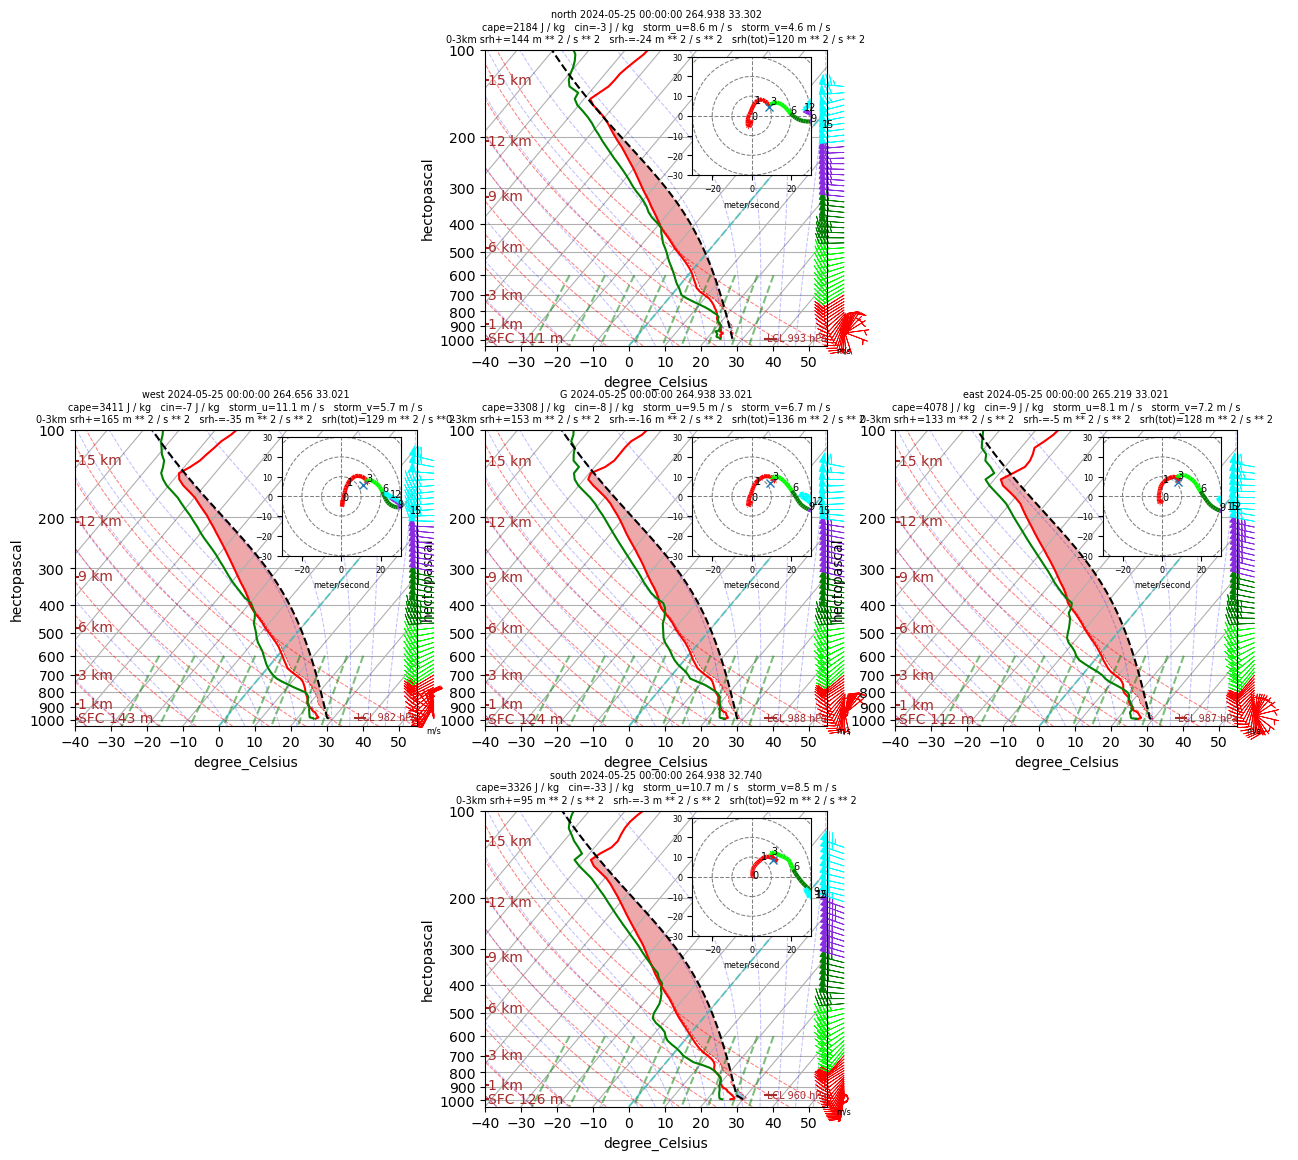

In [19]:
ds0 = cm1.input.era5.model_level(valid_time).load()
# ds0 = cm1.input.era5.aws(valid_time)

isel = cm1.input.era5.nearest_grid_neighbors(ds0, lat=lat, lon=lon)
fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(15, 14))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")

dss = {}
for k, v in isel.items():
    if k == "G":
        i = 5
    elif k == "north":
        i = 2
    elif k == "south":
        i = 8
    elif k == "west":
        i = 4
    elif k == "east":
        i = 6
    else:
        raise ValueError(f"Unknown value {v}")
    if v is not None:
        ds = ds0.isel(v)
        dss[k] = ds
        print(f"{k}: {ds.latitude.values}, {ds.longitude.values}")
        skew = skewt(ds, fig=fig, subplot=(3, 3, i))
        skew.ax.set_title(f"{k} {skew.ax.get_title()}", fontsize="x-small")
        ofile = TMPDIR / f"{skew.ax.get_title().split('\n')[0].replace(' ','_')}.txt"
        with open(ofile, "w") as fh:
            fh.write(cm1.input.sounding.to_txt(ds))
            logging.warning(ofile)

In [20]:
ds0

<xarray.Dataset> Size: 6GB
Dimensions:                      (latitude: 640, level: 137, longitude: 1280,
                                  half_level: 138)
Coordinates:
  * latitude                     (latitude) float64 5kB 89.78 89.51 ... -89.78
  * level                        (level) int32 548B 1 2 3 4 ... 134 135 136 137
  * longitude                    (longitude) float64 10kB 0.0 0.2812 ... 359.7
  * half_level                   (half_level) int32 552B 1 2 3 4 ... 136 137 138
    time                         datetime64[ns] 8B 2024-05-25
Data variables: (12/31)
    Q                            (level, latitude, longitude) float32 449MB <...
    a_half                       (half_level) float64 1kB <Quantity([0.000000...
    a_model                      (level) float64 1kB <Quantity([1.00018250e+0...
    b_half                       (half_level) float64 1kB <Quantity([0.00000e...
    b_model                      (level) float64 1kB <Quantity([0.000000e+00 ...
    weight                       (latitude) float64 5kB <Quantity([1.8088800e...
    ...                           ...
    TVL                          (latitude, longitude) float32 3MB <Quantity(...
    surface_geopotential         (latitude, longitude) float32 3MB <Quantity(...
    surface_geopotential_height  (latitude, longitude) float32 3MB <Quantity(...
    Tv                           (level, latitude, longitude) float32 449MB <...
    Z_half                       (half_level, latitude, longitude) float64 904MB <Quantity([[[ 9.12675248e+04  9.12674205e+04  9.12673739e+04 ...  9.12676553e+04     9.12675434e+04  9.12675516e+04]   [ 9.12743565e+04  9.12742126e+04  9.12741870e+04 ...  9.12745228e+04     9.12744720e+04  9.12744448e+04]   [ 9.12829543e+04  9.12828021e+04  9.12826584e+04 ...  9.12832656e+04     9.12830976e+04  9.12829940e+04]   ...   [ 8.98518735e+04  8.98519132e+04  8.98519708e+04 ...  8.98518220e+04     8.98518751e+04  8.98519219e+04]   [ 8.98292977e+04  8.98293383e+04  8.98292816e+04 ...  8.98292443e+04     8.98292087e+04  8.98293035e+04]   [ 8.98061971e+04  8.98062884e+04  8.98062962e+04 ...  8.98062054e+04     8.98061834e+04  8.98062273e+04]]   [[ 7.52805454e+04  7.52805258e+04  7.52804792e+04 ...  7.52806759e+04     7.52805640e+04  7.52805722e+04]   [ 7.52778708e+04  7.52778128e+04  7.52777873e+04 ...  7.52780371e+04     7.52779864e+04  7.52779591e+04]   [ 7.52762774e+04  7.52762111e+04  7.52760675e+04 ...  7.52765039e+04     7.52764207e+04  7.52763170e+04]   ...   [ 6.99632656e+04  6.99632195e+04  6.99632771e+04 ...  6.99633860e+04     6.99633532e+04  6.99633140e+04]   [ 6.99587596e+04  6.99587143e+04  6.99586576e+04 ...  6.99587921e+04     6.99587566e+04  6.99587654e+04]   [ 6.99542420e+04  6.99542473e+04  6.99542551e+04 ...  6.99542502e+04     6.99542282e+04  6.99542721e+04]]   [[ 7.28738626e+04  7.28738430e+04  7.28737965e+04 ...  7.28739805e+04     7.28738686e+04  7.28738768e+04]   [ 7.28706609e+04  7.28706029e+04  7.28705774e+04 ...  7.28708146e+04     7.28707639e+04  7.28707366e+04]   [ 7.28683650e+04  7.28682987e+04  7.28681551e+04 ...  7.28685790e+04     7.28685083e+04  7.28684047e+04]   ...   [ 6.69240890e+04  6.69240428e+04  6.69241004e+04 ...  6.69242093e+04     6.69241765e+04  6.69241374e+04]   [ 6.69208498e+04  6.69208045e+04  6.69207478e+04 ...  6.69208823e+04     6.69208468e+04  6.69208556e+04]   [ 6.69175360e+04  6.69175414e+04  6.69175492e+04 ...  6.69175443e+04     6.69175223e+04  6.69175662e+04]]   ...   [[ 3.95431529e+01  3.95444610e+01  3.95460543e+01 ...  3.95250009e+01     3.95310880e+01  3.95367796e+01]   [ 3.88394273e+01  3.88364453e+01  3.88334612e+01 ...  3.88823448e+01     3.88683433e+01  3.88538098e+01]   [ 3.80044557e+01  3.80136416e+01  3.80234944e+01 ...  3.80410554e+01     3.80288591e+01  3.80165198e+01]   ...   [ 2.74448868e+03  2.74506354e+03  2.74563881e+03 ...  2.74329584e+03     2.74369332e+03  2.74409107e+03]   [ 2.78131995e+03  2.78179459e+03  2.78226947e+03 ...  2.78037324e+03     2.78068867e+03  2.7810

In [21]:
cm1.input.era5.pressure_level(valid_time).load()

<xarray.Dataset> Size: 1GB
Dimensions:                        (latitude: 721, level: 37, longitude: 1440)
Coordinates:
  * latitude                       (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
  * longitude                      (longitude) float64 12kB 0.0 0.25 ... 359.8
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/30)
    Q                              (level, latitude, longitude) float32 154MB <Quantity([[[4.0346258e-06 4.0346258e-06 4.0346258e-06 ... 4.0346258e-06    4.0346258e-06 4.0346258e-06]   [4.0338691e-06 4.0338691e-06 4.0338691e-06 ... 4.0338691e-06    4.0338691e-06 4.0338691e-06]   [4.0336654e-06 4.0336654e-06 4.0336654e-06 ... 4.0336654e-06    4.0336654e-06 4.0336654e-06]   ...   [3.4468158e-06 3.4468740e-06 3.4469322e-06 ... 3.4466120e-06    3.4466702e-06 3.4467575e-06]   [3.4458262e-06 3.4458553e-06 3.4458844e-06 ... 3.4457098e-06    3.4457389e-06 3.4457680e-06]   [3.4420718e-06 3.4420718e-06 3.4420718e-06 ... 3.4420718e-06    3.4420718e-06 3.4420718e-06]]   [[3.9556217e-06 3.9556217e-06 3.9556217e-06 ... 3.9556217e-06    3.9556217e-06 3.9556217e-06]   [3.9560728e-06 3.9560728e-06 3.9560728e-06 ... 3.9560728e-06    3.9560728e-06 3.9560728e-06]   [3.9563929e-06 3.9563929e-06 3.9563929e-06 ... 3.9563929e-06    3.9563929e-06 3.9563929e-06]   ...   [3.9185288e-06 3.9185288e-06 3.9185288e-06 ... 3.9185288e-06    3.9185288e-06 3.9185288e-06]   [3.9176266e-06 3.9176266e-06 3.9176412e-06 ... 3.9176266e-06    3.9176266e-06 3.9176266e-06]   [3.9150655e-06 3.9150655e-06 3.9150655e-06 ... 3.9150655e-06    3.9150655e-06 3.9150655e-06]]   [[3.8451508e-06 3.8451508e-06 3.8451508e-06 ... 3.8451508e-06    3.8451508e-06 3.8451508e-06]   [3.8443359e-06 3.8443359e-06 3.8443359e-06 ... 3.8443504e-06    3.8443504e-06 3.8443359e-06]   [3.8435792e-06 3.8435792e-06 3.8435792e-06 ... 3.8436083e-06    3.8435937e-06 3.8435937e-06]   ...   [3.9174738e-06 3.9174884e-06 3.9174884e-06 ... 3.9174593e-06    3.9174738e-06 3.9174738e-06]   [3.9177212e-06 3.9177212e-06 3.9177212e-06 ... 3.9177066e-06    3.9177066e-06 3.9177066e-06]   [3.9215920e-06 3.9215920e-06 3.9215920e-06 ... 3.9215920e-06    3.9215920e-06 3.9215920e-06]]   ...   [[1.5859938e-03 1.5859938e-03 1.5859938e-03 ... 1.5859938e-03    1.5859938e-03 1.5859938e-03]   [1.6117430e-03 1.6117430e-03 1.6117430e-03 ... 1.6131735e-03    1.6126967e-03 1.6122198e-03]   [1.5783644e-03 1.5778876e-03 1.5774107e-03 ... 1.5807486e-03    1.5793181e-03 1.5788412e-03]   ...   [1.5292158e-05 1.5292158e-05 1.5292158e-05 ... 1.5292158e-05    1.5292158e-05 1.5292158e-05]   [1.5768996e-05 1.5768996e-05 1.5768996e-05 ... 1.5768996e-05    1.5768996e-05 1.5768996e-05]   [1.4338484e-05 1.4338484e-05 1.4338484e-05 ... 1.4338484e-05    1.4338484e-05 1.4338484e-05]]   [[1.6403532e-03 1.6403532e-03 1.6403532e-03 ... 1.6403532e-03    1.6403532e-03 1.6403532e-03]   [1.6708708e-03 1.6703940e-03 1.6699171e-03 ... 1.6718245e-03    1.6713477e-03 1.6708708e-03]   [1.6618109e-03 1.6608572e-03 1.6603804e-03 ... 1.6641951e-03    1.6632414e-03 1.6622877e-03]   ...   [1.5292158e-05 1.5292158e-05 1.5292158e-05 ... 1.5292158e-05    1.5292158e-05 1.5292158e-05]   [1.5768996e-05 1.5768996e-05 1.5768996e-05 ... 1.5768996e-05    1.5768996e-05 1.5768996e-05]   [1.4338484e-05 1.4338484e-05 1.4338484e-05 ... 1.4338484e-05    1.4338484e-05 1.4338484e-05]]   [[1.7061568e-03 1.7061568e-03 1.7061568e-03 ... 1.7061568e-03    1.7061568e-03 1.7061568e-03]   [1.7586089e-03 1.7581320e-03 1.7576552e-03 ... 1.7600394e-03    1.7595625e-03 1.7590857e-03]   [1.7705298e-03 1.7695761e-03 1.7690993e-03 ... 1.7738676e-03    1.7729140e-03 1.7719603e-03]   ...   [1.5292158e-05 1.5292158e-05 1.5292158e-05 ... 1.5292158e-05    1.5292158e-05 1.5292158e-05]   [1.5768996e-05 1.5768996e-05 1.5768996e-05 ... 1.5768996e-05    1.5768996e-05 1.5768996e-05]   [1.4338484e-05 1.4338484e-05 1.4338484e-05 ... 1.4338484e-05    1.4338484e-05 1.4338484e

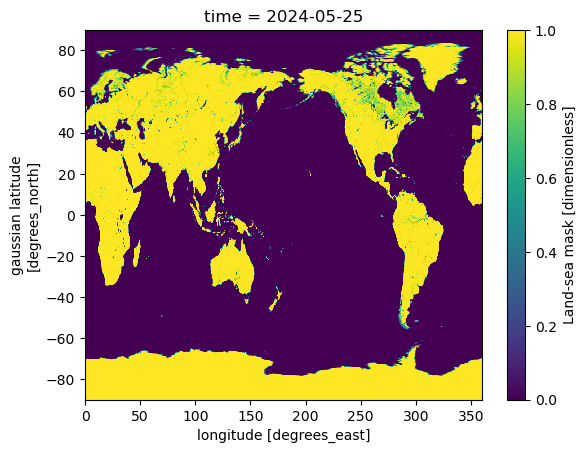

In [22]:
ds0.LSM.plot()

In [23]:
from io import StringIO

s = cm1.input.sounding.to_txt(dss["G"])
print(s)
pd.read_csv(StringIO(s), skiprows=1, sep=" ", names=["Z", "theta", "Q", "U", "V"])

992.6925 298.8787127645023 20.105899810791016
134.52655444300288 298.8787127645023 20.1059 -0.07967186 -2.2638893
156.4713794534343 299.0288975627231 20.141119 -0.58141327 -3.4108925
180.50678543145773 299.55998687766106 19.609488 -1.0344582 -4.3355427
206.8180660348792 300.1083930686935 18.73689 -1.5150185 -4.9855595
235.59558191118126 300.285436889881 18.586445 -1.727417 -4.833845
267.04938074066877 300.43622841166297 18.491995 -1.7922058 -4.413355
301.41589192286676 300.58706325372884 18.412695 -1.7859802 -3.8585262
338.94818091551247 300.73380419345295 18.345634 -1.7181282 -3.2383823
379.90725506200073 300.86787831350836 18.288767 -1.6079369 -2.5572777
424.59265806109187 301.08418146655777 18.217236 -1.4708138 -1.7989979
473.3288179769973 301.3486089621055 18.146645 -1.3057251 -1.0454826
526.4410772803818 301.6594681925817 18.043852 -0.98947144 -0.23566055
584.2712334452158 301.89747305384793 17.888205 -0.7015419 0.5812149
647.1359945105393 301.68761905550434 17.918818 -0.5769615 0

,Z,theta,Q,U,V
0,134.526554,298.878713,20.105900,-0.079672,-2.263889
1,156.471379,299.028898,20.141119,-0.581413,-3.410893
2,180.506785,299.559987,19.609488,-1.034458,-4.335543
3,206.818066,300.108393,18.736890,-1.515019,-4.985559
4,235.595582,300.285437,18.586445,-1.727417,-4.833845
...,...,...,...,...,...
132,66058.517104,3161.851708,0.003926,-28.065060,2.280804
133,68338.937052,3412.393925,0.003562,-25.664513,3.752071
134,70703.626964,3683.093281,0.003131,-20.980034,-4.124508
135,73155.116752,4018.824497,0.002627,-26.735603,-6.558166


## Show difference between pressure-level and model level soundings
* fewer pressure levels than model levels
* winds at surface (10u and 10v) not in pressure-level sounding

2025-02-14 16:06:29,134 - WARNING: some Td > T
2025-02-14 16:06:29,371 - WARNING: some Td > T
2025-02-14 16:06:29,520 - WARNING: Ignore input Tv. Derive from T, qv(p,Td(p,Q))


Text(0.5, 1.0, 'model level  2024-05-25 00:00:00 264.938 33.021\ncape=3308 J / kg   cin=-8 J / kg   storm_u=9.5 m / s   storm_v=6.7 m / s\n0-3km srh+=153 m ** 2 / s ** 2   srh-=-16 m ** 2 / s ** 2   srh(tot)=136 m ** 2 / s ** 2')

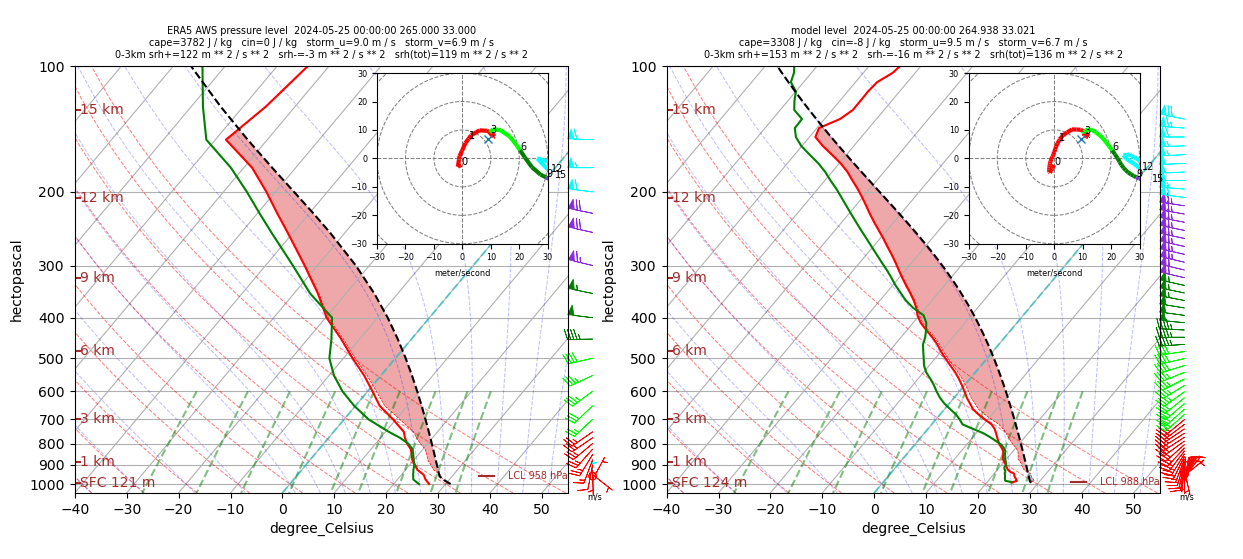

In [24]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(14, 7))
# Hide the axes for all subplots
for ax in axes.flat:
    ax.axis("off")
skew = skewt(ds_aws, fig=fig, subplot=(1, 2, 1))
skew.ax.set_title(f"ERA5 AWS pressure level  {skew.ax.get_title()}", fontsize="x-small")
skew = skewt(ds0.isel(isel["G"]), fig=fig, subplot=(1, 2, 2))
skew.ax.set_title(f"model level  {skew.ax.get_title()}", fontsize="x-small")

In [25]:
cm1.input.sounding.to_txt(ds_aws)

'992.9303125 301.0862121582031 20.30569839477539\n59.748398 299.96044921875 20.16545 0.019332886 -2.007187\n282.11118 300.700120400022 18.483416 -1.5965881 -2.9256134\n511.08325 301.80498317937906 18.071064 -1.0050659 0.7854004\n744.93054 302.0858882830203 17.740532 -0.06703186 2.820877\n983.8162 303.1453620719813 17.534122 1.0405884 5.33963\n1228.2896 304.18987452999113 17.003109 3.0754395 8.131653\n1478.7128 305.73983083680923 16.497965 6.0392914 9.869232\n1735.7816 307.2194676954493 15.943662 8.607178 9.722153\n1999.3607 308.2052574784325 14.67766 10.4969635 8.753311\n2269.6453 309.5881553184888 12.850184 11.310379 7.7236633\n2547.2932 311.22711754721655 10.775223 10.866577 7.551056\n3125.5994 312.84530039637406 7.6691155 9.631577 9.053513\n3735.2942 314.20336664436144 5.798881 10.844574 10.320648\n4383.6636 317.1497856553079 4.455072 13.457092 9.879715\n5078.211 320.202151866144 3.515823 16.701996 7.6543884\n5825.6826 322.91358464556475 2.8827903 19.234695 4.4019775\n6635.7427 326.

In [26]:
ds = cm1.input.sounding.era5_pressure_level(valid_time, lat, lon, glade="/")
ds

<xarray.Dataset> Size: 2kB
Dimensions:                        (level: 37)
Coordinates:
    latitude                       float64 8B 33.0
  * level                          (level) float64 296B 1.0 2.0 ... 975.0 1e+03
    longitude                      float64 8B 265.0
    time                           datetime64[ns] 8B 2024-05-25
Data variables: (12/30)
    Q                              (level) float32 148B <Quantity(dask.array<...
    T                              (level) float32 148B <Quantity(dask.array<...
    U                              (level) float32 148B <Quantity(dask.array<...
    V                              (level) float32 148B <Quantity(dask.array<...
    W                              (level) float32 148B <Quantity(dask.array<...
    Z                              (level) float32 148B <Quantity(dask.array<...
    ...                             ...
    SLOR                           float32 4B <Quantity(dask.array<getitem, s...
    SLT                            float32 4B <Quantity(dask.array<getitem, s...
    TVH                            float32 4B <Quantity(dask.array<getitem, s...
    TVL                            float32 4B <Quantity(dask.array<getitem, s...
    surface_geopotential           float32 4B <Quantity(dask.array<getitem, s...
    surface_geopotential_height    float32 4B <Quantity(dask.array<getitem, s...
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.9.2
    CONVERSION_PLATFORM:  Linux crhtc41 5.14.21-150400.24.46-default #1 SMP P...
    CONVERSION_DATE:      Sun 04 Aug 2024 04:21:22 PM MDT
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug  4 16:21:38 2024: ncks -4 -L 1 --baa=0 --pp...
    NCO:                  netCDF Operators version 5.1.9 (Homepage = http://n...

2025-02-14 16:06:37,824 - WARNING: some Td > T


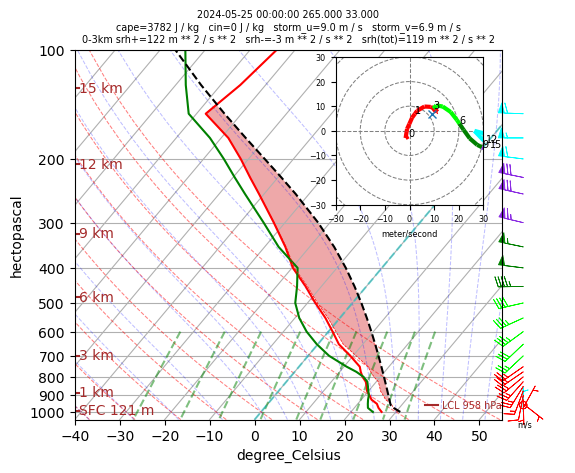

In [27]:
skewt(ds)